# PROJECT: MONTHLY/ ANNUALLY ECOMMERCE REPORT PROJECT


### Table Of Contents

> Introduction



> Objective



> Questions


> **Part 1:** Monthly Report Template | Data Wrangling | Data Analysis & Exploratory Data Analysis


> **Part 2:** Annually Report Template | Data Wrangling | Data Analysis & Exploratory Data Analysis



> Conclusions



## Introduction


> This project contains 12 datasets representing 12 months of sales in 2019 of an eCommerce selling technology products in the USA. Each dataset contains 7 columns representing 7 important field of an order such as order ID, Product, Quantity, Address, Price and Ordered Date. The dataset includes basic booking information like order id, product name, price, quantity, and order address. Let's check if we could find any insights and provide recommendations for this eCommerce to improve their performance.


## Objective

> This project aims to create a file that includes all the overall eCommerce performance for that month, able to update automatically whether a new file is loaded. This file is helpful for staff to update monthly performance to any vendor or line manager quickly. From there, it saves time for the team to do deep-dive analysis.


## Questions:


> 1/ What was the best day for sales? What was the best month for sales?


> 2/ What city has the best value?


> 3/ What time should we display ads to maximize the likelihood of customer's buying product?


> 4/ What products are most often sold?


> 5/ What products are most often sold together?


> 6/ What products sold the most? Why do you think it sold the most?



In [2]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import math
sns.set_theme()

## Part 1: Monthly Sales Report

In [3]:
#import file from local drive
from google.colab import files
uploaded = files.upload()

Saving sales2019_6.csv to sales2019_6.csv


In [6]:
month = pd.read_csv(io.BytesIO(uploaded['sales2019_6.csv']))
month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [7]:
#Drop duplicates and drop nan values
month = month.drop_duplicates()
month = month.dropna()

In [8]:
print(set(month['Quantity Ordered']))

{'3', '1', 'Quantity Ordered', '5', '4', '9', '2', '6'}


**QUESTION 1: WHAT WAS THE BEST DAY FOR SALES?**

In [9]:
month = month[month['Quantity Ordered'] != 'Quantity Ordered']
month['Day'] = month['Order Date'].str.slice(3,5,1)
month['Quantity Ordered'] = pd.to_numeric(month['Quantity Ordered'], downcast = 'integer')
month['Price Each'] = pd.to_numeric(month['Price Each'], downcast = 'float')
month['Sales'] = month['Quantity Ordered'] * month['Price Each']
moving_column = month.pop('Sales')
month.insert(4, 'Sales', moving_column)
month_sales_value = month.groupby('Day')['Sales'].sum().reset_index()
month_sales_value

<ipython-input-9-4174998f52ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['Day'] = month['Order Date'].str.slice(3,5,1)
<ipython-input-9-4174998f52ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['Quantity Ordered'] = pd.to_numeric(month['Quantity Ordered'], downcast = 'integer')
<ipython-input-9-4174998f52ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Day,Sales
0,01,91027.726562
1,02,86997.617188
2,03,85261.906250
3,04,86551.750000
4,05,88272.750000
5,06,87353.039062
6,07,77574.335938
7,08,91870.296875
8,09,99484.390625
9,10,72277.921875


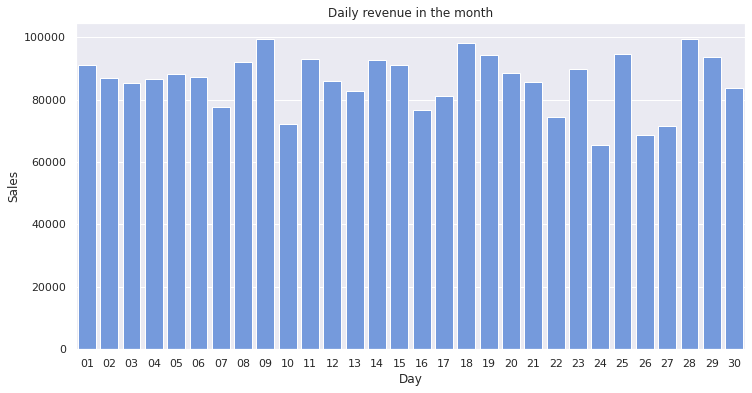

In [10]:
#visualize into chart
plt.figure(figsize = (12,6))
months = range(0,31)
sns.barplot(data=month_sales_value, x="Day", y="Sales", color = 'cornflowerblue')
plt.title('Daily revenue in the month')
plt.show()

**QUESTION 2: WHAT CITY HAS THE BEST VALUE?**

In [11]:
sample_address = '944 Walnut St, Boston, MA 02215	01'
address_to_city = lambda address:address.split(',')[1]
month['City'] = month['Purchase Address'].apply(address_to_city)
month_city_value = round(month.groupby('City')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False))
month_city_value

,City,Sales
7,San Francisco,612808.0
4,Los Angeles,450246.0
5,New York City,323613.0
2,Boston,254573.0
0,Atlanta,219381.0
8,Seattle,213842.0
3,Dallas,188886.0
6,Portland,169452.0
1,Austin,143971.0


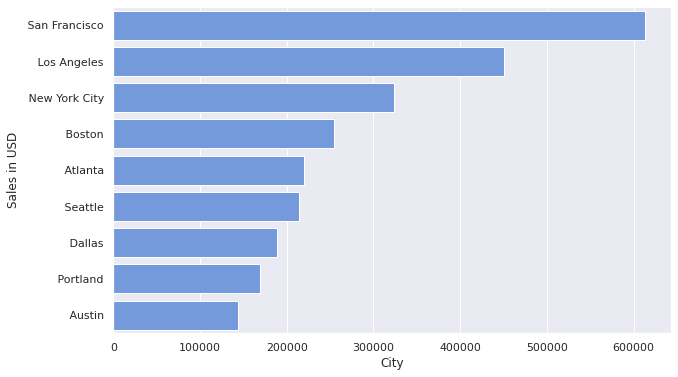

In [13]:
#visualize into chart
plt.figure(figsize = (10,6))
sns.barplot(data= month_city_value, x="Sales", y="City", color = 'cornflowerblue')
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()

**QUESTION 3: WHAT TIME SHOULD WE DISPLAY ADS TO MAXIMIZE THE LIKELIHOOD OF CUSTOMER'S BUYING PRODUCT?**

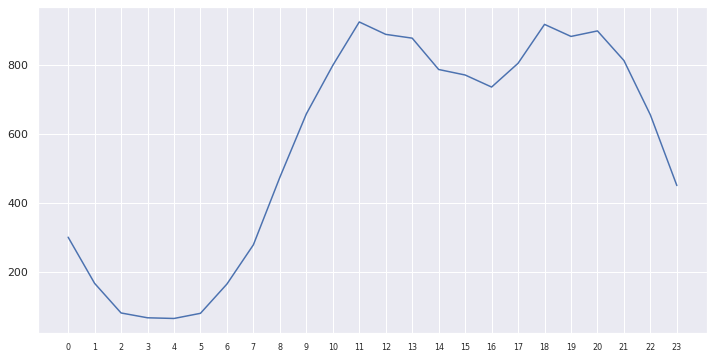

In [14]:
plt.figure(figsize = (12,6))
month['Order Date'] = pd.to_datetime(month['Order Date'])
month['Hours'] = month['Order Date'].dt.hour
sales_value_hours = month.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.xticks(hours, size=8)
plt.show()

**QUESTION 4: WHAT PRODUCTS ARE MOST OFTEM SOLD? WHAT PRODUCTS SOLD THE MOST?** 

In [33]:
month_product_value = month.groupby('Product')['Sales'].sum().reset_index().sort_values(by = 'Product', ascending = True)
month_product_value

,Product,Sales
0,20in Monitor,35306.789062
1,27in 4K Gaming Monitor,176275.468750
2,27in FHD Monitor,85194.320312
3,34in Ultrawide Monitor,172515.453125
4,AA Batteries (4-pack),8033.279785
5,AAA Batteries (4-pack),6455.410156
6,Apple Airpods Headphones,174750.000000
7,Bose SoundSport Headphones,97990.195312
8,Flatscreen TV,110100.000000
9,Google Phone,234600.000000


In [34]:
month_product_count = month.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by = 'Product', ascending = True)
month_product_count

,Product,Quantity Ordered
0,20in Monitor,321.0
1,27in 4K Gaming Monitor,452.0
2,27in FHD Monitor,568.0
3,34in Ultrawide Monitor,454.0
4,AA Batteries (4-pack),2092.0
5,AAA Batteries (4-pack),2159.0
6,Apple Airpods Headphones,1165.0
7,Bose SoundSport Headphones,980.0
8,Flatscreen TV,367.0
9,Google Phone,391.0


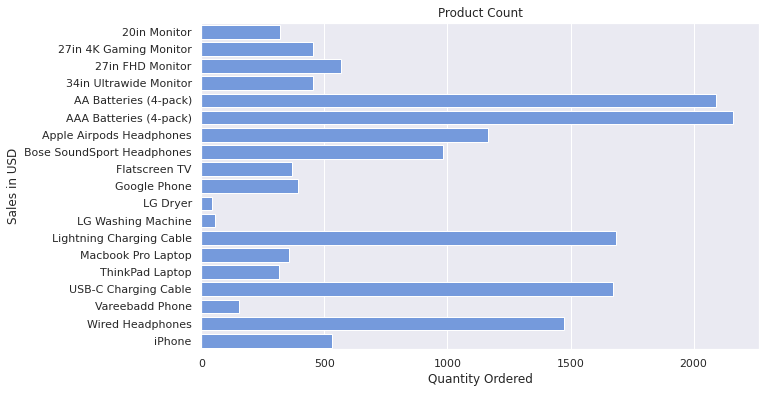

In [35]:
plt.figure(figsize = (10,6))
sns.barplot(data=month_product_count, x="Quantity Ordered", y="Product", color = 'cornflowerblue')
plt.title('Product Count')
plt.ylabel('Sales in USD')
plt.show()

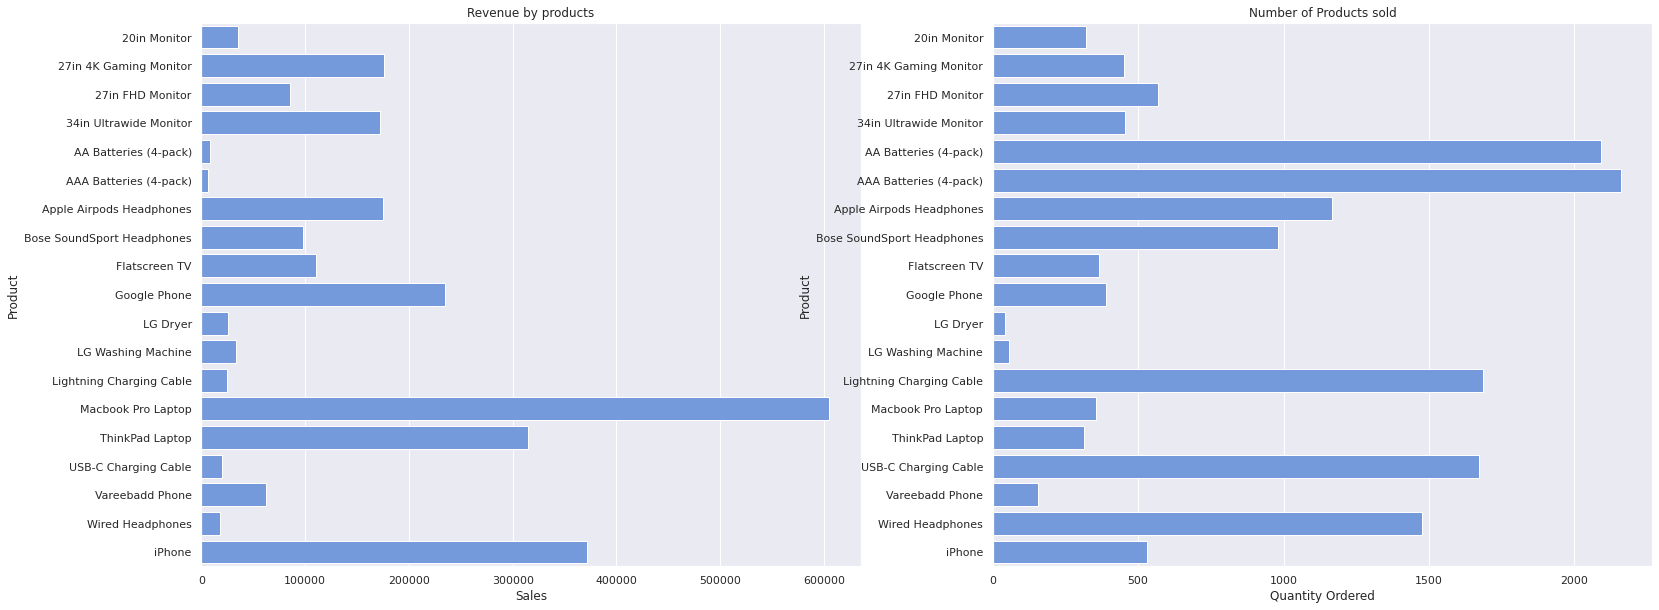

In [40]:
# Innitiate a figure
plt.figure(figsize=(26,10))

# Point to the first subplot
# First subplot is in the layout of 1 row, 2 columns, first slot.
plt.subplot(121)
sns.barplot(data=month_product_value, x="Sales", y="Product", color = 'cornflowerblue')
plt.title('Revenue by products')

# Point to the first subplot
# Second subplot is in the layout of 1 row, 2 columns, second slot.
plt.subplot(122)
sns.barplot(data=month_product_count, x="Quantity Ordered", y="Product", color = 'cornflowerblue')
plt.title('Number of Products sold')

plt.show()

**QUESTION 5: WHAT PRODUCTS ARE MOST OFTEM SOLD TOGETHER?**

In [41]:
#combine multiple rows into 1 row
month_dup = month[month['Order ID'].duplicated(keep=False)]
group_product = lambda product: ','.join(product)     
month_dup['All Products'] = month_dup.groupby('Order ID')['Product'].transform(group_product)
month_dup = month_dup[['Order ID', 'All Products']].drop_duplicates()
month_dup.groupby('All Products')['Order ID'].count().reset_index().sort_values(by = 'Order ID', ascending = False).head(10)

<ipython-input-41-b2b4216df8d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_dup['All Products'] = month_dup.groupby('Order ID')['Product'].transform(group_product)


,All Products,Order ID
137,"iPhone,Lightning Charging Cable",82
70,"Google Phone,USB-C Charging Cable",59
143,"iPhone,Wired Headphones",26
134,"iPhone,Apple Airpods Headphones",24
73,"Google Phone,Wired Headphones",21
113,"Vareebadd Phone,USB-C Charging Cable",20
66,"Google Phone,Bose SoundSport Headphones",11
116,"Vareebadd Phone,Wired Headphones",9
72,"Google Phone,USB-C Charging Cable,Wired Headph...",7
111,"Vareebadd Phone,Bose SoundSport Headphones",6


## Data Wrangling

Step 1: Get data files here https://drive.google.com/drive/folders/1Y2rY-n_iO1dJYcnOgaFhzjPYHr_fD_pD

Step 2: Merge 12 seperated csv files using terminal on mac

Step 3: Open Terminal. Enter 'pwd'. Hit Enter

Step 4: Type 'cd'. Paste file path "/Users/devin/Desktop/combine". Hit Enter

Step 5: Type "cat *.csv >sales_2019.csv" 

In [42]:
#import file from local drive
from google.colab import files
uploaded = files.upload()

Saving sales_2019.csv to sales_2019.csv


In [43]:
df = pd.read_csv(io.BytesIO(uploaded['sales_2019.csv']))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [44]:
#Drop duplicates and drop nan values
df = df.drop_duplicates()
df = df.dropna()

In [45]:
#Double check
df.shape

(185687, 6)

**#QUESTION 1: WHAT WAS THE BEST MONTH FOR SALES?**


In [46]:
df['Month'] = df['Order Date'].str.slice(0,2,1)
df = df[df['Month'] != 'Or']
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
sales_value = df.groupby('Month')['Sales'].sum().reset_index()
sales_value

<ipython-input-46-d2df32916b9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
<ipython-input-46-d2df32916b9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')


,Month,Sales
0,01,1821413.125
1,02,2200078.000
2,03,2804973.250
3,04,3389218.000
4,05,3150616.250
5,06,2576280.250
6,07,2646461.250
7,08,2241083.250
8,09,2094465.625
9,10,3734777.750


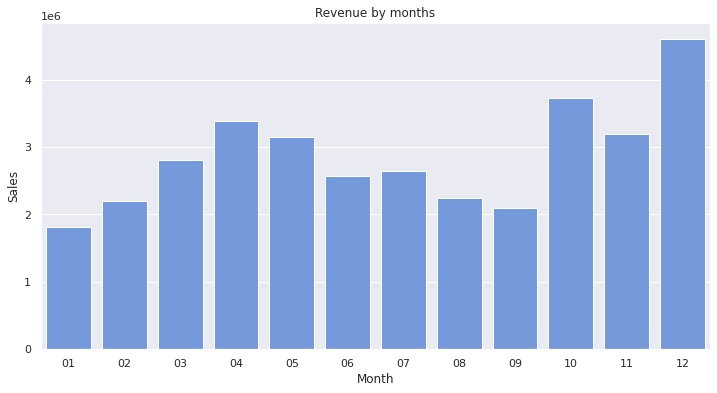

In [47]:
#visualize into chart
plt.figure(figsize = (12,6))
months = range(0,12)
sns.barplot(data=sales_value, x="Month", y="Sales", color = 'cornflowerblue')
plt.xticks(months)
plt.title('Revenue by months')
plt.show()

**#QUESTION 2: WHAT CITY HAS THE BEST VALUE?**

In [48]:
#split City from Purchase Address and create a new City column
sample_address = '944 Walnut St, Boston, MA 02215	01'
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
city_value = df.groupby('City')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False)
city_value

,City,Sales
7,San Francisco,8254743.500
4,Los Angeles,5448304.500
5,New York City,4661867.000
2,Boston,3658627.750
0,Atlanta,2794199.000
3,Dallas,2765374.000
8,Seattle,2745046.000
6,Portland,2319332.000
1,Austin,1818044.375


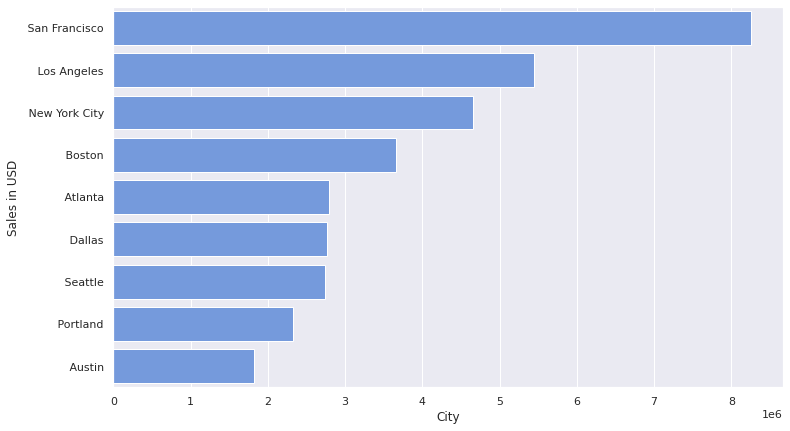

In [49]:
#visualize into chart
plt.figure(figsize = (12,7))
sns.barplot(data= city_value, x="Sales", y="City", color = 'cornflowerblue')
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()

**QUESTION 3: WHAT TIME SHOULD WE DISPLAY ADS TO MAXIMIZE THE LIKELIHOOD OF CUSTOMER'S BUYING PRODUCT?**


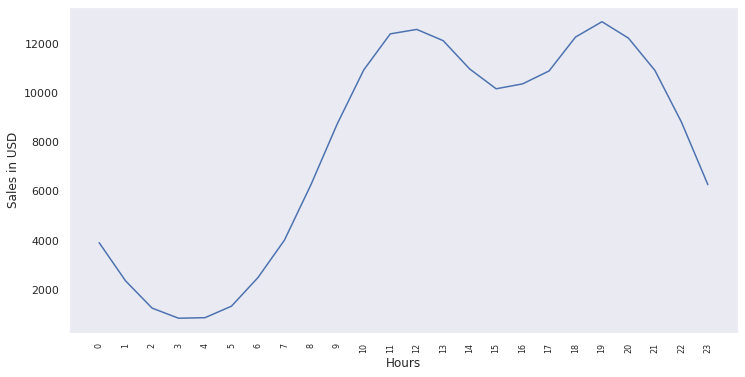

In [50]:
plt.figure(figsize = (12,6))
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

**QUESTION 4: WHAT PRODUCTS ARE MOST OFTEN SOLD?**

In [51]:
product_value = df.groupby('Product')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False)
product_value

,Product,Sales
13,Macbook Pro Laptop,8.032500e+06
18,iPhone,4.792900e+06
14,ThinkPad Laptop,4.127959e+06
9,Google Phone,3.317400e+06
1,27in 4K Gaming Monitor,2.433148e+06
3,34in Ultrawide Monitor,2.352898e+06
6,Apple Airpods Headphones,2.345550e+06
8,Flatscreen TV,1.443900e+06
7,Bose SoundSport Headphones,1.342866e+06
2,27in FHD Monitor,1.131075e+06


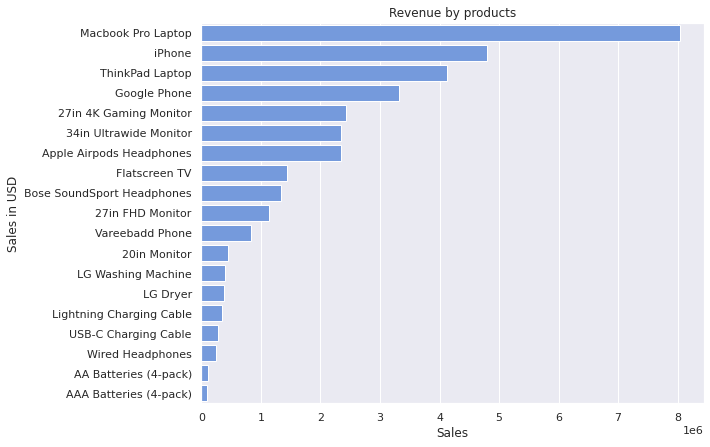

In [52]:
plt.figure(figsize = (9,7))
sns.barplot(data=product_value, x="Sales", y="Product", color = 'cornflowerblue')
plt.title('Revenue by products')
plt.ylabel('Sales in USD')
plt.show()

**QUESTION 5: WHAT PRODUCTS ARE MOST OFTEM SOLD TOGETHER?**

In [56]:
#combine multiple rows into 1 row
df_dup = df[df['Order ID'].duplicated(keep=False)]
group_product = lambda product: ','.join(product)     
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(group_product)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup.groupby('All Products')['Order ID'].count().reset_index().sort_values(by = 'Order ID', ascending = False).head(10)

<ipython-input-56-63f6dfdd6c0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(group_product)


,All Products,Order ID
329,"iPhone,Lightning Charging Cable",886
165,"Google Phone,USB-C Charging Cable",857
348,"iPhone,Wired Headphones",361
286,"Vareebadd Phone,USB-C Charging Cable",312
180,"Google Phone,Wired Headphones",303
321,"iPhone,Apple Airpods Headphones",286
156,"Google Phone,Bose SoundSport Headphones",161
292,"Vareebadd Phone,Wired Headphones",104
175,"Google Phone,USB-C Charging Cable,Wired Headph...",79
279,"Vareebadd Phone,Bose SoundSport Headphones",60


*Assembling multiple products or services to sell in a package not only increases your overall sales but it also… Gives you the ability to sell slow moving merchandise. Automatically upsells your customers without having to ask for it.*

**QUESTION 6: WHAT PRODUCTS SOLD THE MOST? WHY DO YOU THINK IT SOLD THE MOST?**

In [57]:
product_count = df.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by = 'Quantity Ordered', ascending = False)
product_count

,Product,Quantity Ordered
5,AAA Batteries (4-pack),30986.0
4,AA Batteries (4-pack),27615.0
15,USB-C Charging Cable,23931.0
12,Lightning Charging Cable,23169.0
17,Wired Headphones,20524.0
6,Apple Airpods Headphones,15637.0
7,Bose SoundSport Headphones,13430.0
2,27in FHD Monitor,7541.0
18,iPhone,6847.0
1,27in 4K Gaming Monitor,6239.0


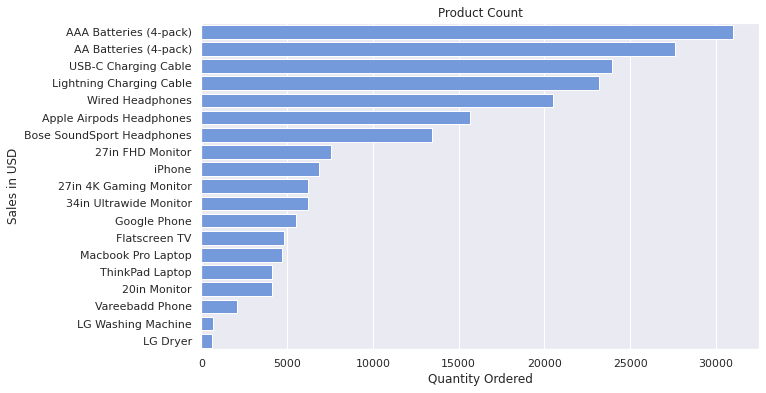

In [58]:
plt.figure(figsize = (10,6))
sns.barplot(data=product_count, x="Quantity Ordered", y="Product", color = 'cornflowerblue')
plt.title('Product Count')
plt.ylabel('Sales in USD')
plt.show()

**QUESTION 7: BEST PRODUCT SOLD EACH MONTH? BEST PRODUCT SALES EACH MONTH**

In [77]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [129]:
month_sales = df.groupby(['Month', 'Product'])['Sales'].sum().reset_index()
month_sales_max = month_sales.loc[month_sales.groupby("Month")["Sales"].idxmax()]
month_sales_max.columns = ['Month',	'Product Sales', 'Max Sales']
month_sales_max

,Month,Product Sales,Max Sales
13,01,Macbook Pro Laptop,399500.0
32,02,Macbook Pro Laptop,469200.0
51,03,Macbook Pro Laptop,644300.0
70,04,Macbook Pro Laptop,771800.0
89,05,Macbook Pro Laptop,788800.0
108,06,Macbook Pro Laptop,605200.0
127,07,Macbook Pro Laptop,625600.0
146,08,Macbook Pro Laptop,506600.0
165,09,Macbook Pro Laptop,487900.0
184,10,Macbook Pro Laptop,892500.0


In [128]:
month_count = df.groupby(['Month', 'Product'])['Order ID'].count().reset_index()
month_count_max = month_count.loc[month_count.groupby("Month")["Order ID"].idxmax()]
month_count_max.columns = ['Month',	'Product Count', 'Max Count']
month_count_max

,Month,Product Count,Max Count
15,01,USB-C Charging Cable,1171
34,02,USB-C Charging Cable,1511
53,03,USB-C Charging Cable,1766
69,04,Lightning Charging Cable,2197
88,05,Lightning Charging Cable,1929
107,06,Lightning Charging Cable,1560
126,07,Lightning Charging Cable,1690
137,08,AA Batteries (4-pack),1357
167,09,USB-C Charging Cable,1451
186,10,USB-C Charging Cable,2437


In [130]:
month_check = pd.merge(month_sales_max, month_count_max, on = 'Month', how = 'inner')
month_check

,Month,Product Sales,Max Sales,Product Count,Max Count
0,01,Macbook Pro Laptop,399500.0,USB-C Charging Cable,1171
1,02,Macbook Pro Laptop,469200.0,USB-C Charging Cable,1511
2,03,Macbook Pro Laptop,644300.0,USB-C Charging Cable,1766
3,04,Macbook Pro Laptop,771800.0,Lightning Charging Cable,2197
4,05,Macbook Pro Laptop,788800.0,Lightning Charging Cable,1929
5,06,Macbook Pro Laptop,605200.0,Lightning Charging Cable,1560
6,07,Macbook Pro Laptop,625600.0,Lightning Charging Cable,1690
7,08,Macbook Pro Laptop,506600.0,AA Batteries (4-pack),1357
8,09,Macbook Pro Laptop,487900.0,USB-C Charging Cable,1451
9,10,Macbook Pro Laptop,892500.0,USB-C Charging Cable,2437


## Conclusions:


**MONTHLY REPORT (JUNE)**

*   **June 9th** and **June 28th** were the 2 days with the **highest sales**. While day 24 was the day with lowest sales in June
*   **San Fransico** was the state with highest sales in June. Followed by Los Angeles and New York city
*   **11AM - 1PM** and **6PM -8PM** were 2 peak hours. 
*   **Macbook Pro Laptop, Iphone and Thinkpad laptop** were top 3 highest sales items
*   **AAA Batteries (4-pack), AA Batteries (4-pack), USB-C Charging Cable** were top 3 products highest product sold
*   **iPhone & Lightning Charging Cable** was the most-sale combo






**ANNUALLY REPORT**

*   **December** had the highest sale in 2019, recorded 4.6 million USD. Followed by October with 3.7 million USD
*   **San Fransico** was the state with highest sales in 2019, with 8.2 million revenue tracked
*   **11AM - 1PM** and **6PM -8PM** were 2 most peak hours. 
*   **Macbook Pro Laptop, Iphone and Thinkpad laptop** were top 3 highest sales items
*   **iPhone & Lightning Charging Cable** was the most-sale combo  
*   **Macbook Pro Laptop, Iphone and Thinkpad laptop** were top 3 highest sales items
*   **Macbook Pro Laptop** was the product with the highest sales among 12 months. While **AAA Batteries (4-pack), AA Batteries (4-pack), USB-C Charging Cable** were top 3 products highest product sold
